In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher

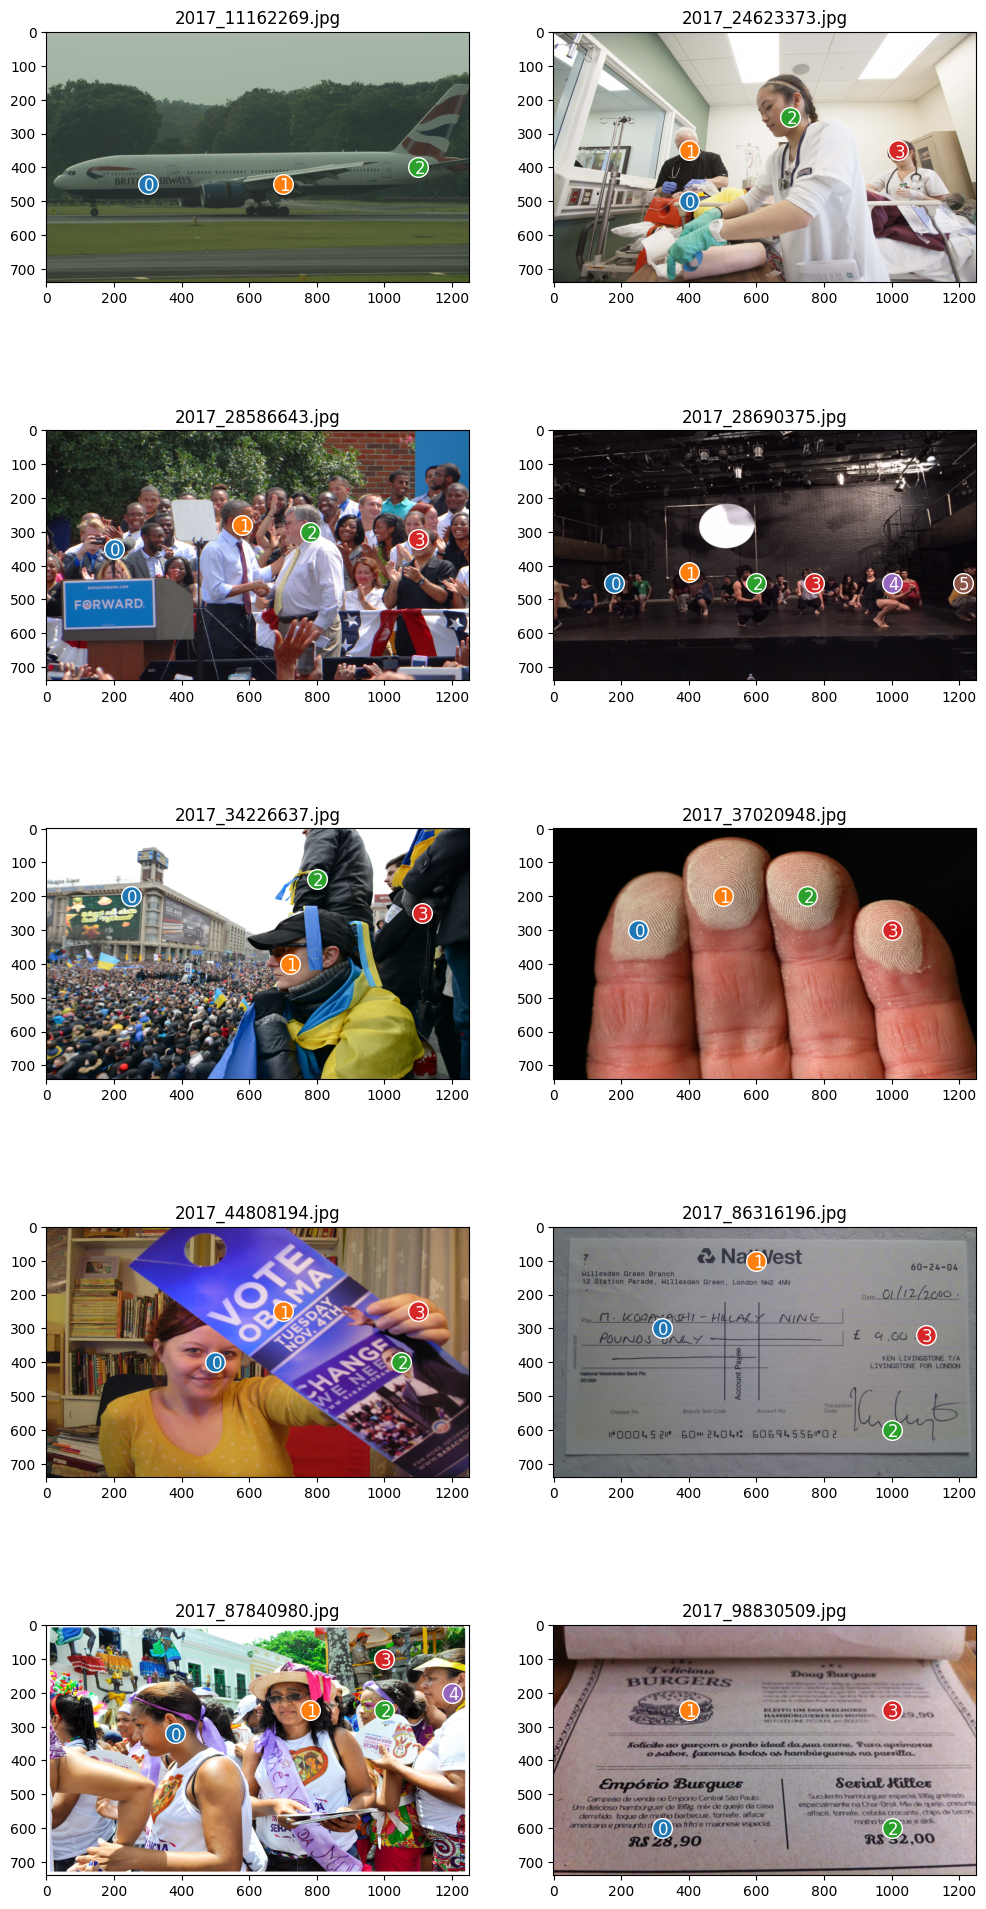

In [3]:
dl = DataLoader("../eyelink_data")
imgs = dl.get_annotated_images()
fig, ax = PlotUtils.wrap_subplots(len(imgs), 2)

for i, img in enumerate(imgs):
    img_file = dl.get_image(img)
    aois = dl.get_image_aois(img)
    PlotUtils.plot_aois(aois=aois, title=img, image=img_file, ax=ax[i])

/home/simontitk/projects/python/gaze3p/src/_graphutils.py:107: RuntimeWarning: invalid value encountered in divide
  transition_matrix_norm = transition_matrix / rows_sum


[0.         0.33333333 0.33333333 0.33333333]
1.584962500721156
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
1.9999999999999998
[-0.          0.33333333  0.33333333  0.33333333]
1.584962500721156
[0.         0.33333333 0.33333333 0.33333333]
1.584962500721156
[0.25 0.25 0.25 0.25]
2.0


/home/simontitk/projects/python/gaze3p/src/_graphutils.py:107: RuntimeWarning: invalid value encountered in divide
  transition_matrix_norm = transition_matrix / rows_sum
/home/simontitk/projects/python/gaze3p/src/_graphutils.py:107: RuntimeWarning: invalid value encountered in divide
  transition_matrix_norm = transition_matrix / rows_sum


[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[-0.          0.33333333  0.33333333  0.33333333]
1.584962500721156
[-0.          0.33333333  0.33333333  0.33333333]
1.584962500721156


/home/simontitk/projects/python/gaze3p/src/_graphutils.py:107: RuntimeWarning: invalid value encountered in divide
  transition_matrix_norm = transition_matrix / rows_sum
/home/simontitk/projects/python/gaze3p/src/_graphutils.py:107: RuntimeWarning: invalid value encountered in divide
  transition_matrix_norm = transition_matrix / rows_sum


[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0
[0.25 0.25 0.25 0.25]
2.0


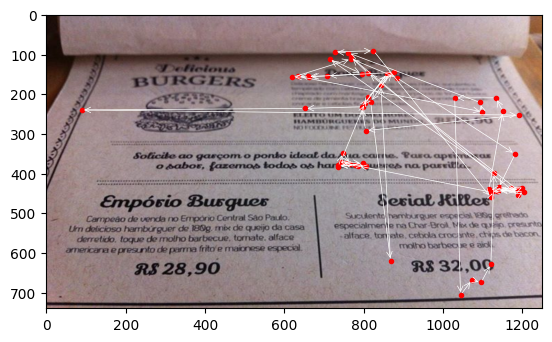

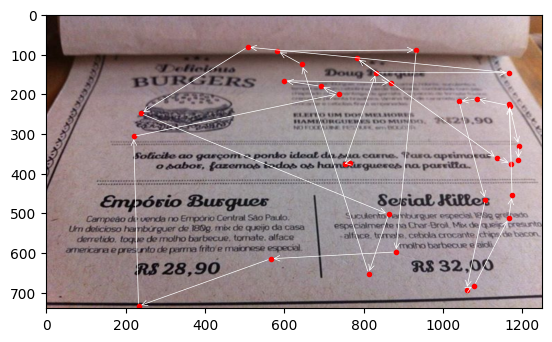

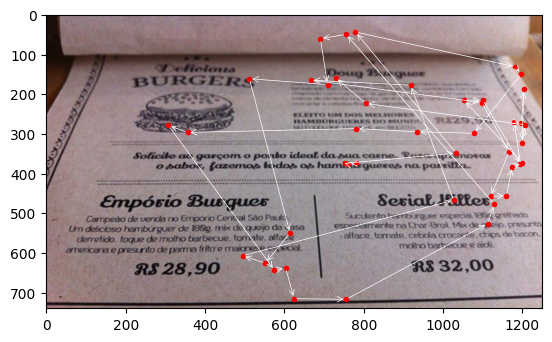

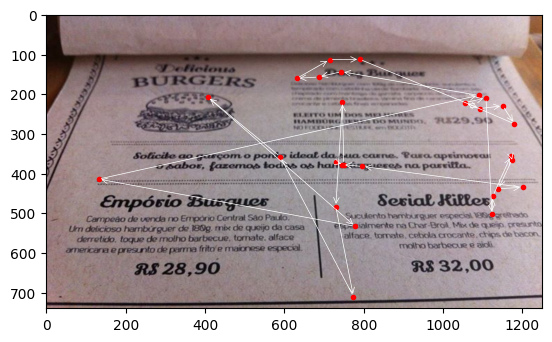

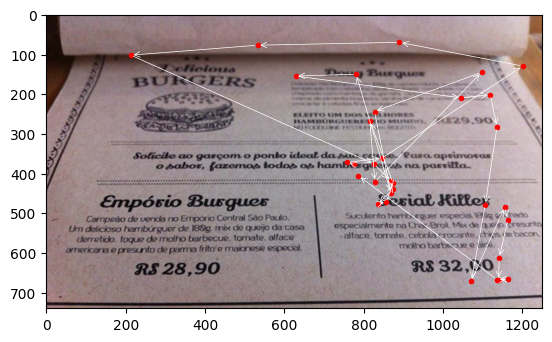

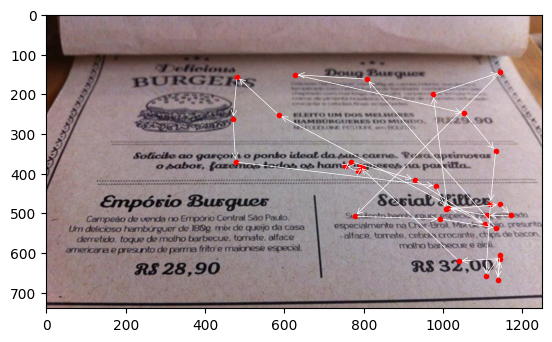

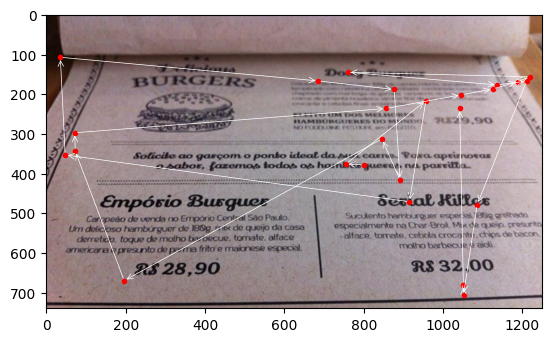

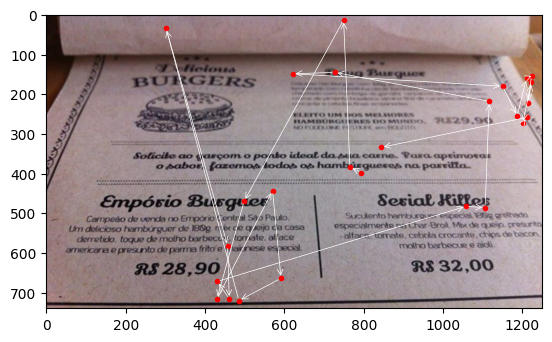

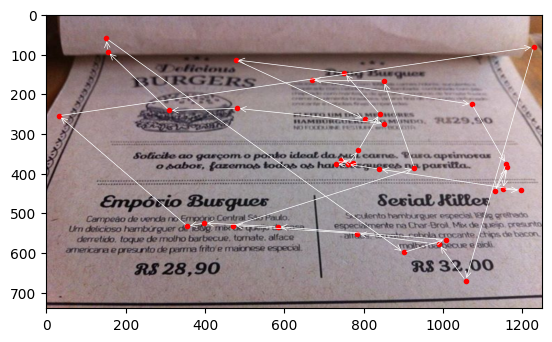

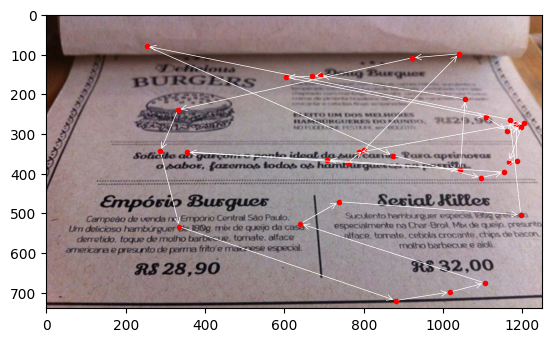

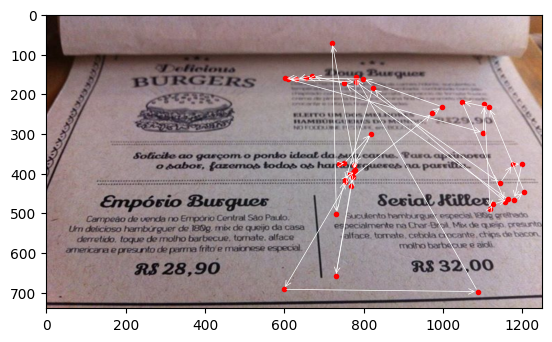

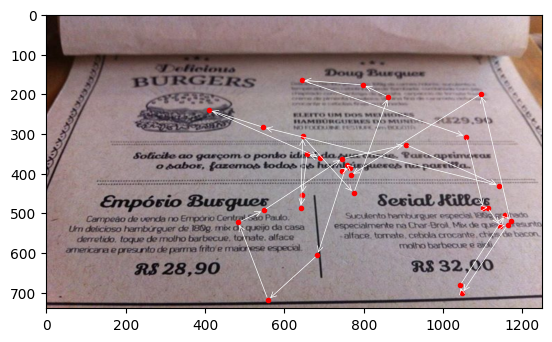

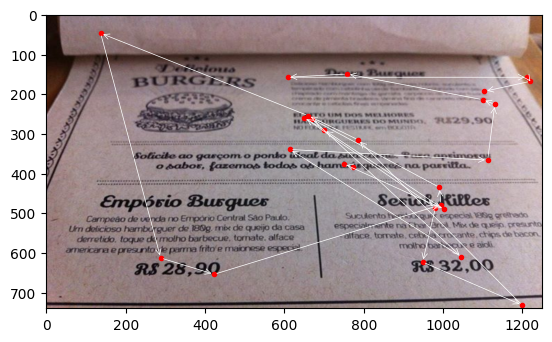

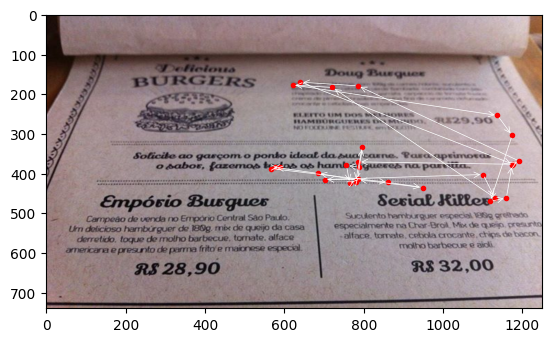

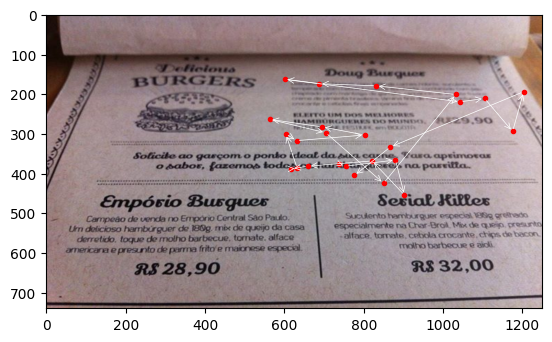

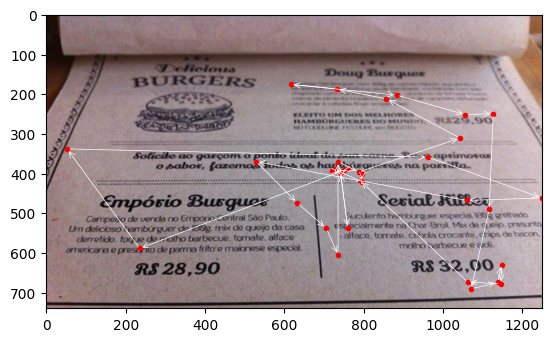

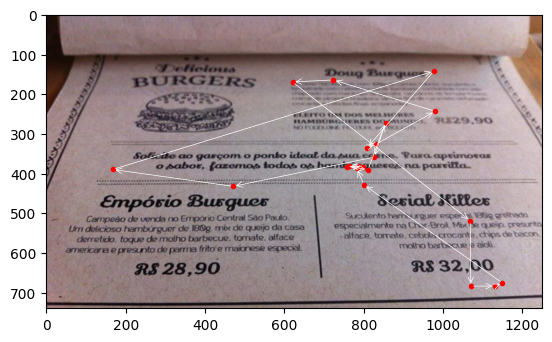

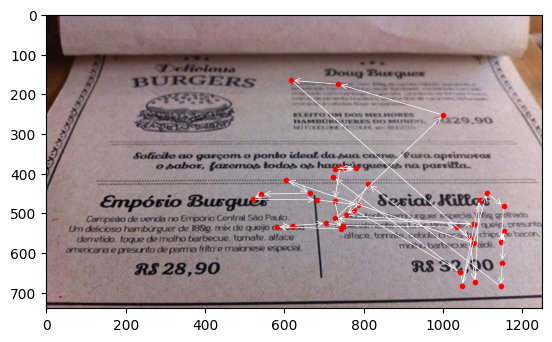

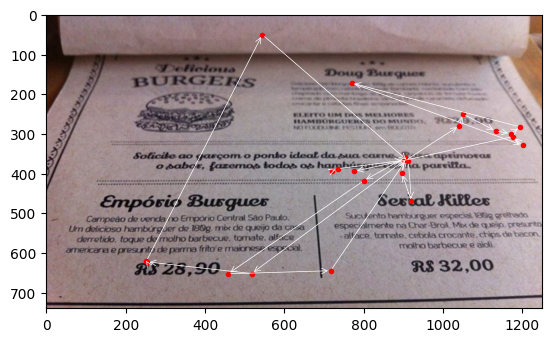

In [24]:
aois = dl.get_image_aois(img)
for i in range(1, 20):
    try:
        trial = dl.get_subject_trial(1, i)
        trial_clustered = GraphUtils.cluster_to_aois(trial, aois)
        m = GraphUtils.transition_matrix(trial_clustered, aois=aois)
        PlotUtils.trace_plot(trial_clustered, image=img_file)
        GraphUtils.transition_entropy(m)
        print(GraphUtils.stationairy_entropy(m))
    except:
        pass